## import dependencies

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

## load data

In [2]:
df = pd.read_csv('../data/data_sudah_bersih.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Pengiriman            9691 non-null   object 
 1   Tanggal                  9691 non-null   object 
 2   Waktu_Keberangkatan      9691 non-null   object 
 3   Waktu_Kedatangan         9691 non-null   object 
 4   Lat_Jemput               9691 non-null   float64
 5   Lon_Jemput               9691 non-null   float64
 6   Lat_Tujuan               9691 non-null   float64
 7   Lon_Tujuan               9691 non-null   float64
 8   Jarak_KM_Terukur         9691 non-null   float64
 9   ID_Kurir                 9691 non-null   int64  
 10  Tipe_Kendaraan           9691 non-null   object 
 11  Pengalaman_Kurir         9691 non-null   object 
 12  Jumlah_Paket             9691 non-null   int64  
 13  Kondisi_Cuaca            9691 non-null   object 
 14  Kondisi_Lalu_Lintas     

In [3]:
# object ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Waktu_Keberangkatan'] = pd.to_datetime(df['Waktu_Keberangkatan'])
df['Waktu_Kedatangan'] = pd.to_datetime(df['Waktu_Kedatangan'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Pengiriman            9691 non-null   object        
 1   Tanggal                  9691 non-null   datetime64[ns]
 2   Waktu_Keberangkatan      9691 non-null   datetime64[ns]
 3   Waktu_Kedatangan         9691 non-null   datetime64[ns]
 4   Lat_Jemput               9691 non-null   float64       
 5   Lon_Jemput               9691 non-null   float64       
 6   Lat_Tujuan               9691 non-null   float64       
 7   Lon_Tujuan               9691 non-null   float64       
 8   Jarak_KM_Terukur         9691 non-null   float64       
 9   ID_Kurir                 9691 non-null   int64         
 10  Tipe_Kendaraan           9691 non-null   object        
 11  Pengalaman_Kurir         9691 non-null   object        
 12  Jumlah_Paket             9691 non-

## Feature Engineering

In [4]:
df.head()

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Tipe_Kendaraan,Pengalaman_Kurir,Jumlah_Paket,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Area_Tujuan,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,2023-10-09 12:09:35.444386,-6.187770,106.884394,-6.324869,106.783430,39.447726,21,Motor,Menengah,37,Badai,Sedang,Perumahan,101.590740,63.494212,1
1,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,2023-09-15 17:53:45.354053,-6.140012,106.898952,-6.140302,106.711119,19.092558,7,Motor,Menengah,5,Hujan_Ringan,Ringan,Perumahan,46.755901,42.690170,0
2,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,2023-09-21 14:05:42.112794,-6.101567,106.948339,-6.204143,106.927419,1.000000,1,Motor,Menengah,5,Cerah,Sedang,Perumahan,8.701880,7.614145,0
3,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,2023-09-19 13:53:23.355129,-6.112538,106.778596,-6.292112,106.655991,23.393818,1,Motor,Rendah,11,Cerah,Sedang,Perumahan,43.389252,37.965596,0
4,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,2023-09-11 15:15:47.785700,-6.085218,106.912228,-6.172220,106.816521,17.144595,18,Mobil_Van,Rendah,16,Cerah,Ringan,Perumahan,23.796428,24.986250,0


In [5]:
df.describe()

,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
count,9691,9691,9691,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000
mean,2023-09-30 20:48:11.416778496,2023-09-30 20:48:11.416778496,2023-09-30 21:33:53.297527296,-6.197638,106.798249,-6.200412,106.800504,21.289130,24.965432,21.827262,45.698012,40.334227,0.046538
min,2023-09-01 07:01:00,2023-09-01 07:01:00,2023-09-01 07:10:08.759818,-6.349986,106.650002,-6.349995,106.650003,1.000000,1.000000,5.000000,5.000000,-21.089756,0.000000
25%,2023-09-15 19:21:00,2023-09-15 19:21:00,2023-09-15 20:07:28.760557568,-6.271613,106.722333,-6.275658,106.726160,11.004318,13.000000,13.000000,22.264043,20.594671,0.000000
50%,2023-09-30 12:02:00,2023-09-30 12:02:00,2023-09-30 12:55:58.612155904,-6.196669,106.798409,-6.201043,106.801456,21.132235,25.000000,22.000000,43.032301,39.956525,0.000000
75%,2023-10-15 16:42:30,2023-10-15 16:42:30,2023-10-15 17:27:01.473426432,-6.124559,106.872642,-6.124198,106.874909,31.142623,37.000000,30.000000,64.850414,59.073355,0.000000
max,2023-10-30 19:50:00,2023-10-30 19:50:00,2023-10-30 20:39:41.437826,-6.050030,106.949937,-6.050008,106.949987,59.020737,49.000000,39.000000,189.809055,119.756683,1.000000
std,NaN,NaN,NaN,0.086212,0.086386,0.086903,0.086352,12.615379,14.114640,10.048227,29.175116,24.953385,0.210658


In [6]:
# ekstrak kolom tanggal menjadi hari, 0 : senin | 6 : minggu
df['Hari'] = df['Tanggal'].dt.day_of_week

In [7]:
# ekstrak jam pada kolom waktu_keberangkatan
df['Jam'] = df['Waktu_Keberangkatan'].dt.hour

In [8]:
# jika jam keberangkatan berada pada peak hour yaitu jam 10.00 dan 15.00, maka bernilai 1
df['Is_Peak_Hour'] = df['Jam'].apply(lambda x: 1 if (x==10) or (x==15) else 0)

In [9]:
# jika hari pengantaran adalah hari hari sabtu dan minggu maka bernilai 1
df['Is_Weekend'] = df['Hari'].apply(lambda x : 1 if (x==5) or (x==6) else 0)

In [10]:
# ekstrak kepadatan kerja kurir antara volume dan jarak (apakah kurir membawa banyak paket untuk jarak dekat (pengiriman pada) atatu sedikit untuk jarak jauh)
df['Volume_vs_Jarak'] = df['Jumlah_Paket'] / df['Jarak_KM_Terukur']

In [11]:
# kolom haversine : menghitung jarak antara 2 titk dengan memperhitungkan kelengkungan bumi
def haversine_row(lat1, lon1, lat2, lon2):
    R = 6371  # radius bumi dalam km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c


df['Haversine_KM'] = haversine_row(df['Lat_Jemput'], df['Lon_Jemput'], df['Lat_Tujuan'], df['Lon_Tujuan'])

In [12]:
# menghitung kecepatan (KM/menit)
df['Kecepatan'] = df['Jarak_KM_Terukur']/df['Durasi_Pengiriman_Menit']

In [13]:
df.describe()

,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan,Hari,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan
count,9691,9691,9691,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000
mean,2023-09-30 20:48:11.416778496,2023-09-30 20:48:11.416778496,2023-09-30 21:33:53.297527296,-6.197638,106.798249,-6.200412,106.800504,21.289130,24.965432,21.827262,45.698012,40.334227,0.046538,3.086472,12.995563,0.148695,0.304303,2.942996,17.371620,0.495315
min,2023-09-01 07:01:00,2023-09-01 07:01:00,2023-09-01 07:10:08.759818,-6.349986,106.650002,-6.349995,106.650003,1.000000,1.000000,5.000000,5.000000,-21.089756,0.000000,0.000000,7.000000,0.000000,0.000000,0.096888,0.066664,0.034411
25%,2023-09-15 19:21:00,2023-09-15 19:21:00,2023-09-15 20:07:28.760557568,-6.271613,106.722333,-6.275658,106.726160,11.004318,13.000000,13.000000,22.264043,20.594671,0.000000,1.000000,10.000000,0.000000,0.000000,0.595268,10.909941,0.375437
50%,2023-09-30 12:02:00,2023-09-30 12:02:00,2023-09-30 12:55:58.612155904,-6.196669,106.798409,-6.201043,106.801456,21.132235,25.000000,22.000000,43.032301,39.956525,0.000000,3.000000,13.000000,0.000000,0.000000,1.025983,17.062113,0.480650
75%,2023-10-15 16:42:30,2023-10-15 16:42:30,2023-10-15 17:27:01.473426432,-6.124559,106.872642,-6.124198,106.874909,31.142623,37.000000,30.000000,64.850414,59.073355,0.000000,5.000000,16.000000,0.000000,1.000000,2.042610,23.450501,0.578942
max,2023-10-30 19:50:00,2023-10-30 19:50:00,2023-10-30 20:39:41.437826,-6.050030,106.949937,-6.050008,106.949987,59.020737,49.000000,39.000000,189.809055,119.756683,1.000000,6.000000,19.000000,1.000000,1.000000,39.000000,44.615859,2.794845
std,NaN,NaN,NaN,0.086212,0.086386,0.086903,0.086352,12.615379,14.114640,10.048227,29.175116,24.953385,0.210658,2.021697,3.754664,0.355806,0.460135,6.013950,8.242631,0.221515


In [14]:
df.columns

Index(['ID_Pengiriman', 'Tanggal', 'Waktu_Keberangkatan', 'Waktu_Kedatangan',
       'Lat_Jemput', 'Lon_Jemput', 'Lat_Tujuan', 'Lon_Tujuan',
       'Jarak_KM_Terukur', 'ID_Kurir', 'Tipe_Kendaraan', 'Pengalaman_Kurir',
       'Jumlah_Paket', 'Kondisi_Cuaca', 'Kondisi_Lalu_Lintas',
       'Tipe_Area_Tujuan', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit',
       'Status_Keterlambatan', 'Hari', 'Jam', 'Is_Peak_Hour', 'Is_Weekend',
       'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan'],
      dtype='object')

In [15]:
df['Kondisi_Lalu_Lintas'].value_counts()

Kondisi_Lalu_Lintas
Ringan    5344
Sedang    2854
Padat     1493
Name: count, dtype: int64

## Encoding

In [16]:
# memisahkan kolom kategoris yang memiliki tipe ordinal (berurutan) dengan nominal (tanpa urutan)
ordinal_feature = ['Pengalaman_Kurir', 'Kondisi_Cuaca', 'Kondisi_Lalu_Lintas']
nominal_feature = ['Tipe_Kendaraan', 'Tipe_Area_Tujuan']

# membuat urutan untuk setiap tipe kolom ordinal
urutan_pengalaman = ['Rendah', 'Menengah', 'Tinggi']
urutan_cuaca = ['Cerah', 'Hujan_Ringan', 'Badai']
urutan_lalin = ['Ringan', 'Sedang', 'Padat']

In [17]:
# one hot encoding
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[urutan_pengalaman, urutan_cuaca, urutan_lalin])

In [18]:
# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_feature),
        ('onehot', onehot_encoder, nominal_feature)
    ],
    remainder='passthrough'
)

encoded_df = preprocessor.fit_transform(df)

# membuat dataframe baru dengan nama kolom hasil encoding
encoded_columns = (
    ordinal_feature + list(preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_feature))
)

In [19]:
encoded_columns

['Pengalaman_Kurir',
 'Kondisi_Cuaca',
 'Kondisi_Lalu_Lintas',
 'Tipe_Kendaraan_Motor',
 'Tipe_Kendaraan_Truk_Kecil',
 'Tipe_Area_Tujuan_Industri',
 'Tipe_Area_Tujuan_Perumahan']

In [20]:
# buah encoded_df menjadi dataframe
encoded_df = pd.DataFrame(encoded_df, columns=encoded_columns + [col for col in df.columns if col not in ordinal_feature + nominal_feature])
encoded_df.head()

,Pengalaman_Kurir,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk_Kecil,Tipe_Area_Tujuan_Industri,Tipe_Area_Tujuan_Perumahan,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,...,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan,Hari,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan
0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,...,101.59074,63.494212,1,0,10,1,0,0.93795,18.892992,0.3883
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,...,46.755901,42.69017,0,4,17,0,0,0.261882,20.766288,0.408345
2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,...,8.70188,7.614145,0,3,13,0,0,5.0,11.637968,0.114918
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,...,43.389252,37.965596,0,1,13,0,0,0.47021,24.132985,0.539162
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,...,23.796428,24.98625,0,0,14,0,0,0.933239,14.337137,0.720469


## Scaling

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Pengiriman            9691 non-null   object        
 1   Tanggal                  9691 non-null   datetime64[ns]
 2   Waktu_Keberangkatan      9691 non-null   datetime64[ns]
 3   Waktu_Kedatangan         9691 non-null   datetime64[ns]
 4   Lat_Jemput               9691 non-null   float64       
 5   Lon_Jemput               9691 non-null   float64       
 6   Lat_Tujuan               9691 non-null   float64       
 7   Lon_Tujuan               9691 non-null   float64       
 8   Jarak_KM_Terukur         9691 non-null   float64       
 9   ID_Kurir                 9691 non-null   int64         
 10  Tipe_Kendaraan           9691 non-null   object        
 11  Pengalaman_Kurir         9691 non-null   object        
 12  Jumlah_Paket             9691 non-

In [22]:
['Jarak_KM_Terukur', 'Jumlah_Paket', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit', 'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']

['Jarak_KM_Terukur',
 'Jumlah_Paket',
 'Durasi_Pengiriman_Menit',
 'ETA_Awal_Menit',
 'Volume_vs_Jarak',
 'Haversine_KM',
 'Kecepatan']

In [23]:
df.head()

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,...,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan,Hari,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan
0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,2023-10-09 12:09:35.444386,-6.187770,106.884394,-6.324869,106.783430,39.447726,21,...,101.590740,63.494212,1,0,10,1,0,0.937950,18.892992,0.388300
1,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,2023-09-15 17:53:45.354053,-6.140012,106.898952,-6.140302,106.711119,19.092558,7,...,46.755901,42.690170,0,4,17,0,0,0.261882,20.766288,0.408345
2,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,2023-09-21 14:05:42.112794,-6.101567,106.948339,-6.204143,106.927419,1.000000,1,...,8.701880,7.614145,0,3,13,0,0,5.000000,11.637968,0.114918
3,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,2023-09-19 13:53:23.355129,-6.112538,106.778596,-6.292112,106.655991,23.393818,1,...,43.389252,37.965596,0,1,13,0,0,0.470210,24.132985,0.539162
4,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,2023-09-11 15:15:47.785700,-6.085218,106.912228,-6.172220,106.816521,17.144595,18,...,23.796428,24.986250,0,0,14,0,0,0.933239,14.337137,0.720469


In [24]:
df[['Jarak_KM_Terukur', 'Jumlah_Paket', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit', 'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']].head()

,Jarak_KM_Terukur,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Volume_vs_Jarak,Haversine_KM,Kecepatan
0,39.447726,37,101.590740,63.494212,0.937950,18.892992,0.388300
1,19.092558,5,46.755901,42.690170,0.261882,20.766288,0.408345
2,1.000000,5,8.701880,7.614145,5.000000,11.637968,0.114918
3,23.393818,11,43.389252,37.965596,0.470210,24.132985,0.539162
4,17.144595,16,23.796428,24.986250,0.933239,14.337137,0.720469


### Mengecek distribusi data

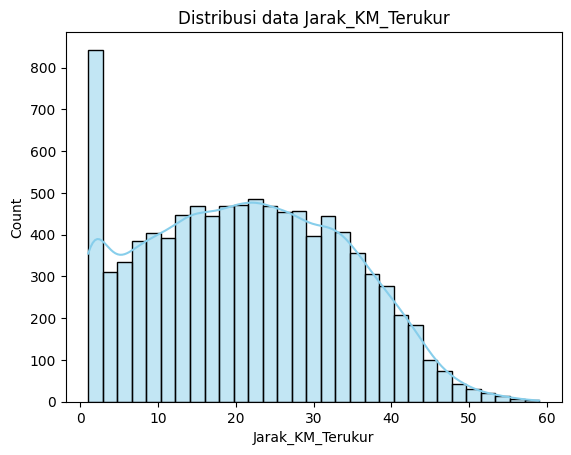

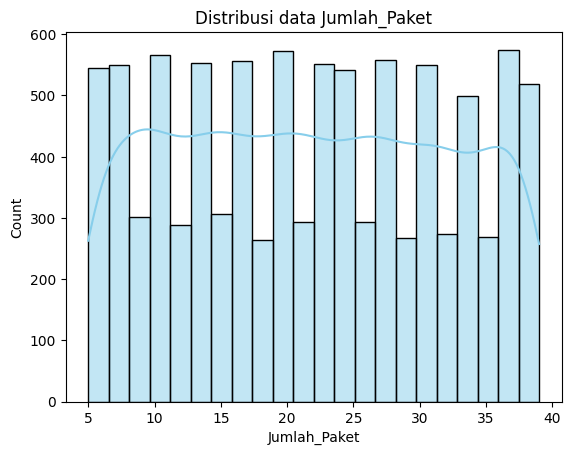

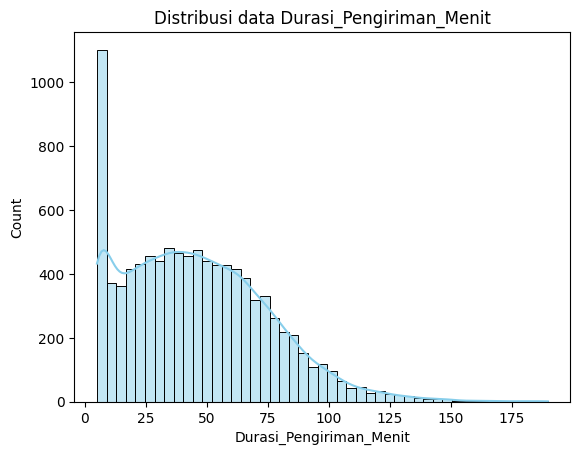

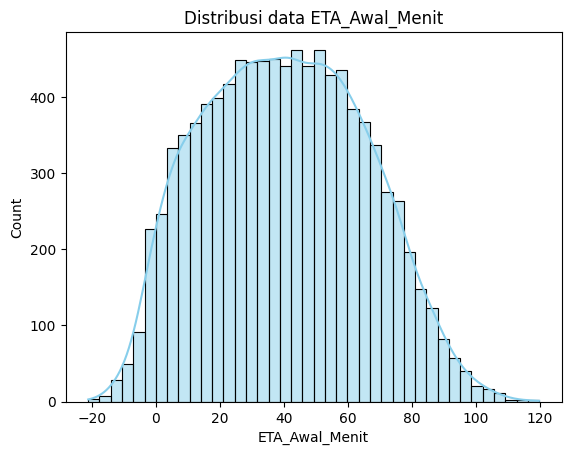

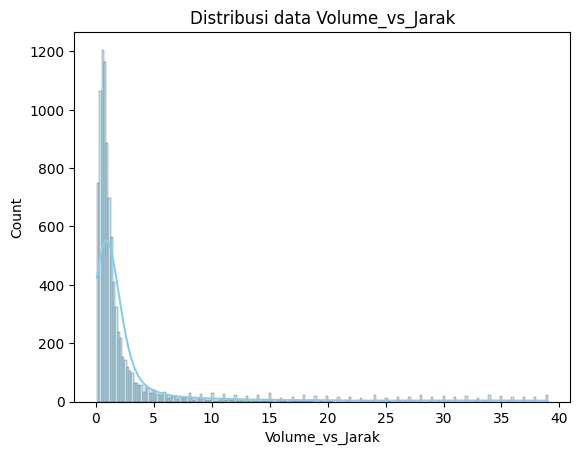

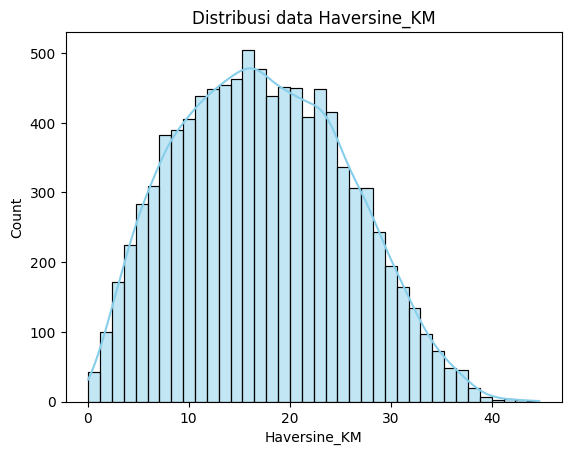

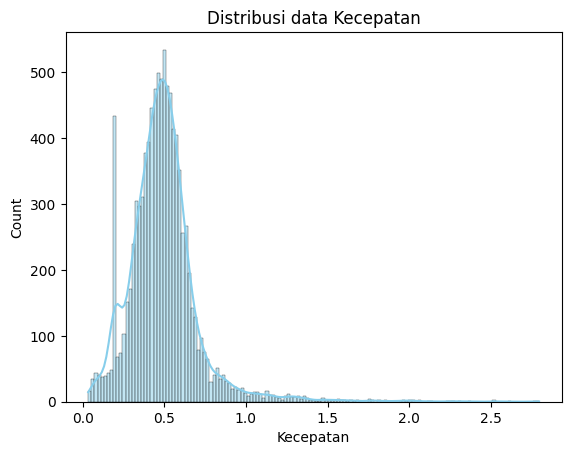

In [25]:
kolom = ['Jarak_KM_Terukur', 'Jumlah_Paket', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit', 'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']

for kol in kolom:
    sns.histplot(df[kol], kde=True, color='skyblue')
    plt.title(f'Distribusi data {kol}')
    plt.show()

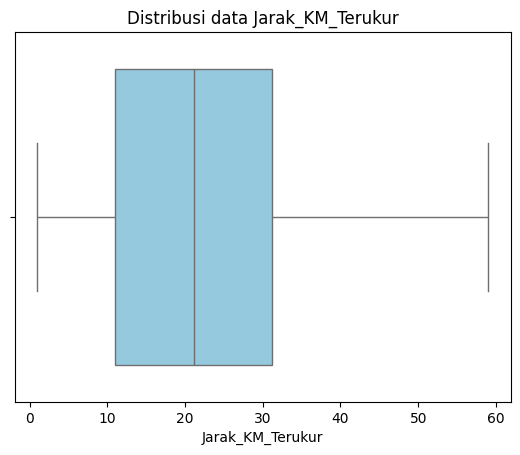

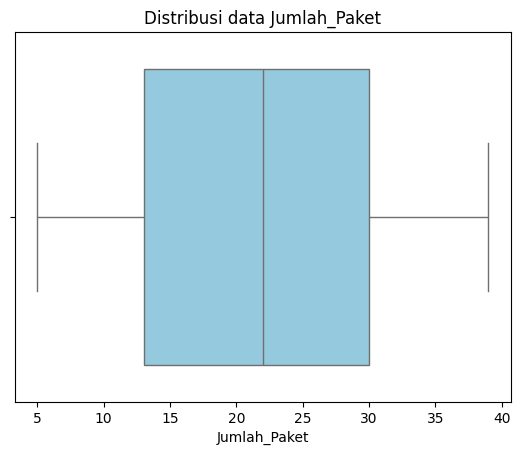

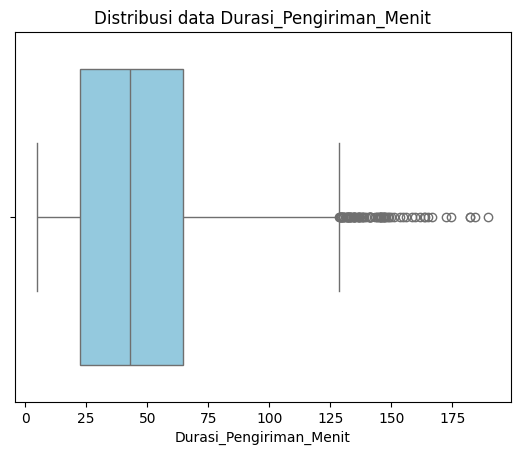

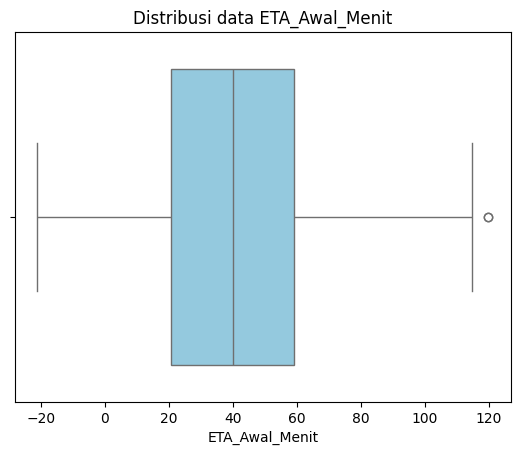

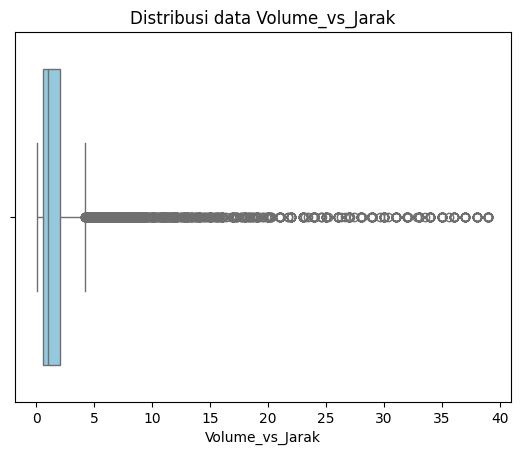

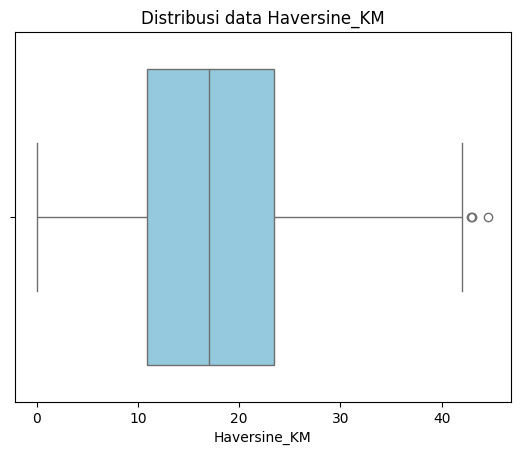

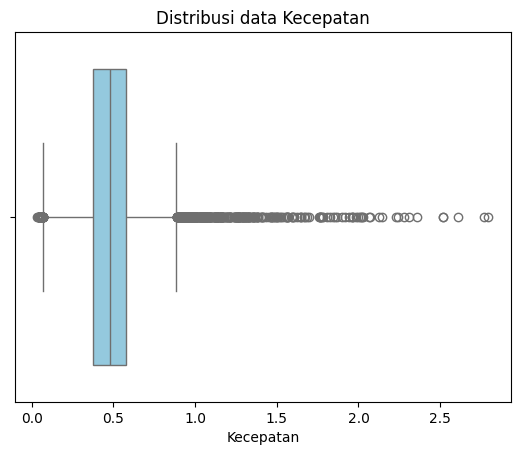

In [26]:
kolom = ['Jarak_KM_Terukur', 'Jumlah_Paket', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit', 'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']

for kol in kolom:
    sns.boxplot(x = df[kol], color='skyblue')
    plt.title(f'Distribusi data {kol}')
    plt.show()

- Right Skewed = Jarak_KM_Terukur, Durasi_Pengiriman_Menit(banyak outlier), Kecepatan (banyak outlier), Volume_vs_Jarak(banyak outlier)
- Normal = ETA_Awal_Menit, Haversine_KM
- Tanpa distribusi jelas = Jumlah paket

In [28]:
df[kolom].describe()

,Jarak_KM_Terukur,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Volume_vs_Jarak,Haversine_KM,Kecepatan
count,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000
mean,21.289130,21.827262,45.698012,40.334227,2.942996,17.371620,0.495315
std,12.615379,10.048227,29.175116,24.953385,6.013950,8.242631,0.221515
min,1.000000,5.000000,5.000000,-21.089756,0.096888,0.066664,0.034411
25%,11.004318,13.000000,22.264043,20.594671,0.595268,10.909941,0.375437
50%,21.132235,22.000000,43.032301,39.956525,1.025983,17.062113,0.480650
75%,31.142623,30.000000,64.850414,59.073355,2.042610,23.450501,0.578942
max,59.020737,39.000000,189.809055,119.756683,39.000000,44.615859,2.794845


In [36]:
log_kolom = ['Jarak_KM_Terukur', 'Durasi_Pengiriman_Menit', 'Kecepatan', 'Volume_vs_Jarak']
df[[f'log_{kolom}' for kolom in log_kolom]] = df[log_kolom].apply(np.log)

In [37]:
df.columns

Index(['ID_Pengiriman', 'Tanggal', 'Waktu_Keberangkatan', 'Waktu_Kedatangan',
       'Lat_Jemput', 'Lon_Jemput', 'Lat_Tujuan', 'Lon_Tujuan',
       'Jarak_KM_Terukur', 'ID_Kurir', 'Tipe_Kendaraan', 'Pengalaman_Kurir',
       'Jumlah_Paket', 'Kondisi_Cuaca', 'Kondisi_Lalu_Lintas',
       'Tipe_Area_Tujuan', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit',
       'Status_Keterlambatan', 'Hari', 'Jam', 'Is_Peak_Hour', 'Is_Weekend',
       'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan',
       'log_Durasi_Pengiriman_Menit', 'log_Kecepatan', 'log_Volume_vs_Jarak',
       'log_Jarak_KM_Terukur'],
      dtype='object')

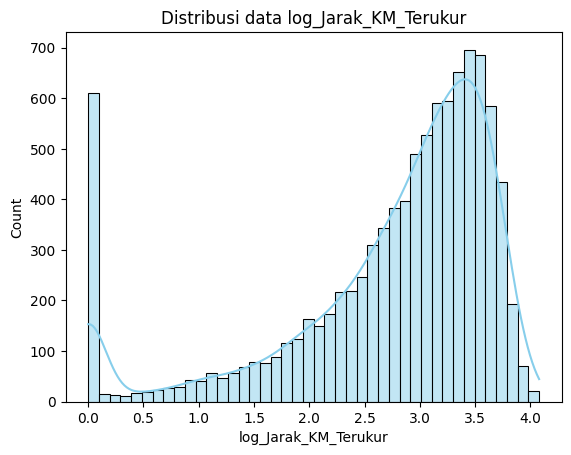

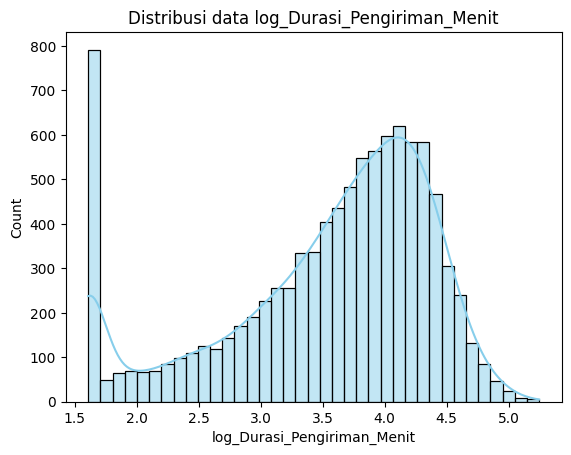

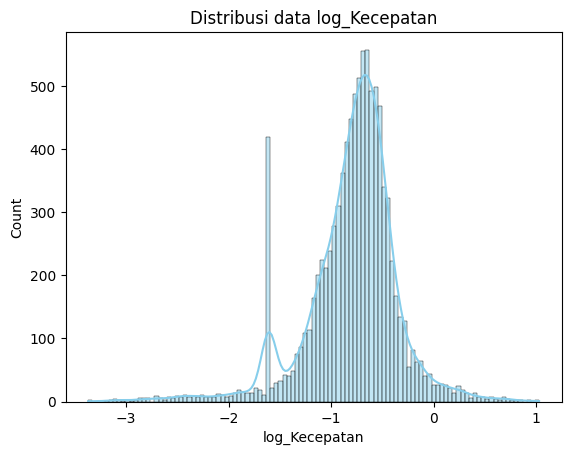

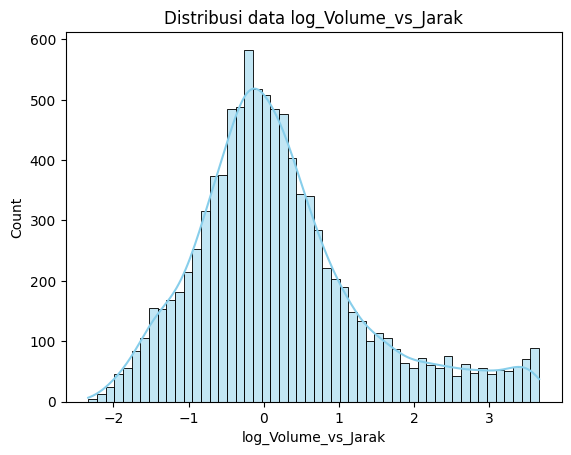

In [38]:
log_kolom = ['log_Jarak_KM_Terukur', 'log_Durasi_Pengiriman_Menit', 'log_Kecepatan', 'log_Volume_vs_Jarak']

for kol in log_kolom:
    sns.histplot(df[kol], kde=True, color='skyblue')
    plt.title(f'Distribusi data {kol}')
    plt.show()

### Robust scaler

In [41]:
log_kolom = ['log_Jarak_KM_Terukur', 'log_Durasi_Pengiriman_Menit', 'log_Kecepatan', 'log_Volume_vs_Jarak']

robust_scaler = RobustScaler()
df[log_kolom] = robust_scaler.fit_transform(df[log_kolom])
df.head()

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,...,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan,log_Durasi_Pengiriman_Menit,log_Kecepatan,log_Volume_vs_Jarak,log_Jarak_KM_Terukur
0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,2023-10-09 12:09:35.444386,-6.187770,106.884394,-6.324869,106.783430,39.447726,21,...,10,1,0,0.937950,18.892992,0.388300,0.803473,-0.492623,-0.072758,0.600003
1,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,2023-09-15 17:53:45.354053,-6.140012,106.898952,-6.140302,106.711119,19.092558,7,...,17,0,0,0.261882,20.766288,0.408345,0.077625,-0.376408,-1.107496,-0.097570
2,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,2023-09-21 14:05:42.112794,-6.101567,106.948339,-6.204143,106.927419,1.000000,1,...,13,0,0,5.000000,11.637968,0.114918,-1.495086,-3.303819,1.284528,-2.932644
3,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,2023-09-19 13:53:23.355129,-6.112538,106.778596,-6.292112,106.655991,23.393818,1,...,13,0,0,0.470210,24.132985,0.539162,0.007727,0.265232,-0.632802,0.097734
4,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,2023-09-11 15:15:47.785700,-6.085218,106.912228,-6.172220,106.816521,17.144595,18,...,14,0,0,0.933239,14.337137,0.720469,-0.554120,0.934545,-0.076843,-0.201018


### standar scaler

In [43]:
stadard_kolom = ['ETA_Awal_Menit', 'Haversine_KM', 'Jumlah_Paket']

standard_scaler = StandardScaler()
df[[f'sta_{kolom}' for kolom in stadard_kolom]] = standard_scaler.fit_transform(df[stadard_kolom])

In [44]:
df

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,...,Volume_vs_Jarak,Haversine_KM,Kecepatan,log_Durasi_Pengiriman_Menit,log_Kecepatan,log_Volume_vs_Jarak,log_Jarak_KM_Terukur,sta_ETA_Awal_Menit,sta_Haversine_KM,sta_Jumlah_Paket
0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,2023-10-09 12:09:35.444386,-6.187770,106.884394,-6.324869,106.783430,39.447726,21,...,0.937950,18.892992,0.388300,0.803473,-0.492623,-0.072758,0.600003,0.928178,0.184583,1.510070
1,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,2023-09-15 17:53:45.354053,-6.140012,106.898952,-6.140302,106.711119,19.092558,7,...,0.261882,20.766288,0.408345,0.077625,-0.376408,-1.107496,-0.097570,0.094419,0.411864,-1.674736
2,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,2023-09-21 14:05:42.112794,-6.101567,106.948339,-6.204143,106.927419,1.000000,1,...,5.000000,11.637968,0.114918,-1.495086,-3.303819,1.284528,-2.932644,-1.311316,-0.695645,-1.674736
3,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,2023-09-19 13:53:23.355129,-6.112538,106.778596,-6.292112,106.655991,23.393818,1,...,0.470210,24.132985,0.539162,0.007727,0.265232,-0.632802,0.097734,-0.094927,0.820334,-1.077585
4,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,2023-09-11 15:15:47.785700,-6.085218,106.912228,-6.172220,106.816521,17.144595,18,...,0.933239,14.337137,0.720469,-0.554120,0.934545,-0.076843,-0.201018,-0.615098,-0.368164,-0.579959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686,DEL-09996,2023-10-18 19:23:00,2023-10-18 19:23:00,2023-10-18 19:36:00.235803,-6.274319,106.914373,-6.296232,106.695672,12.504907,18,...,2.079184,24.294772,0.961625,-1.119341,1.601167,0.572863,-0.504358,-1.160455,0.839964,0.415292
9687,DEL-09997,2023-09-10 16:29:00,2023-09-10 16:29:00,2023-09-10 16:56:42.562602,-6.212237,106.777828,-6.091339,106.669638,15.942894,27,...,1.066306,17.994004,0.575361,-0.411726,0.415268,0.031265,-0.270873,-0.644776,0.075512,-0.480434
9688,DEL-09998,2023-09-29 13:09:00,2023-09-29 13:09:00,2023-09-29 14:31:58.652977,-6.317196,106.805639,-6.334591,106.780991,31.577534,18,...,0.950043,3.340912,0.380555,0.614173,-0.539142,-0.062369,0.386091,1.154762,-1.702300,0.813393
9689,DEL-09999,2023-10-09 13:27:00,2023-10-09 13:27:00,2023-10-09 13:39:35.411509,-6.051906,106.651384,-6.149936,106.705850,1.000000,4,...,27.000000,12.453309,0.079427,-1.149585,-4.156667,2.652279,-2.932644,-1.174964,-0.596723,0.514818
